# Understanding nighttime methane signals at the Amazon Tall Tower Observatory (ATTO)

### Santiago Botía B, et al., (2019)
### Plots for Sections 3.2


In [44]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns
import scipy
from IPython.core.display import Image, display
from IPython.display import IFrame
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [45]:
# Plot settings
line_width  = 0.7
marker_size = 2
font_size   = 6   # for paper 7

## Section 3.2. Atmospheric characteristics of positive CH4 gradients

### Section 3.2.1 CH4 positive gradients and wind direction for 2013-2018
### Figure 7. Annulus at monthly and diurnal scales
- This plot was generated in Rstudio using the openair package
- The scripts are found in this directory and the csv file used in Rstudio is found in ./Data

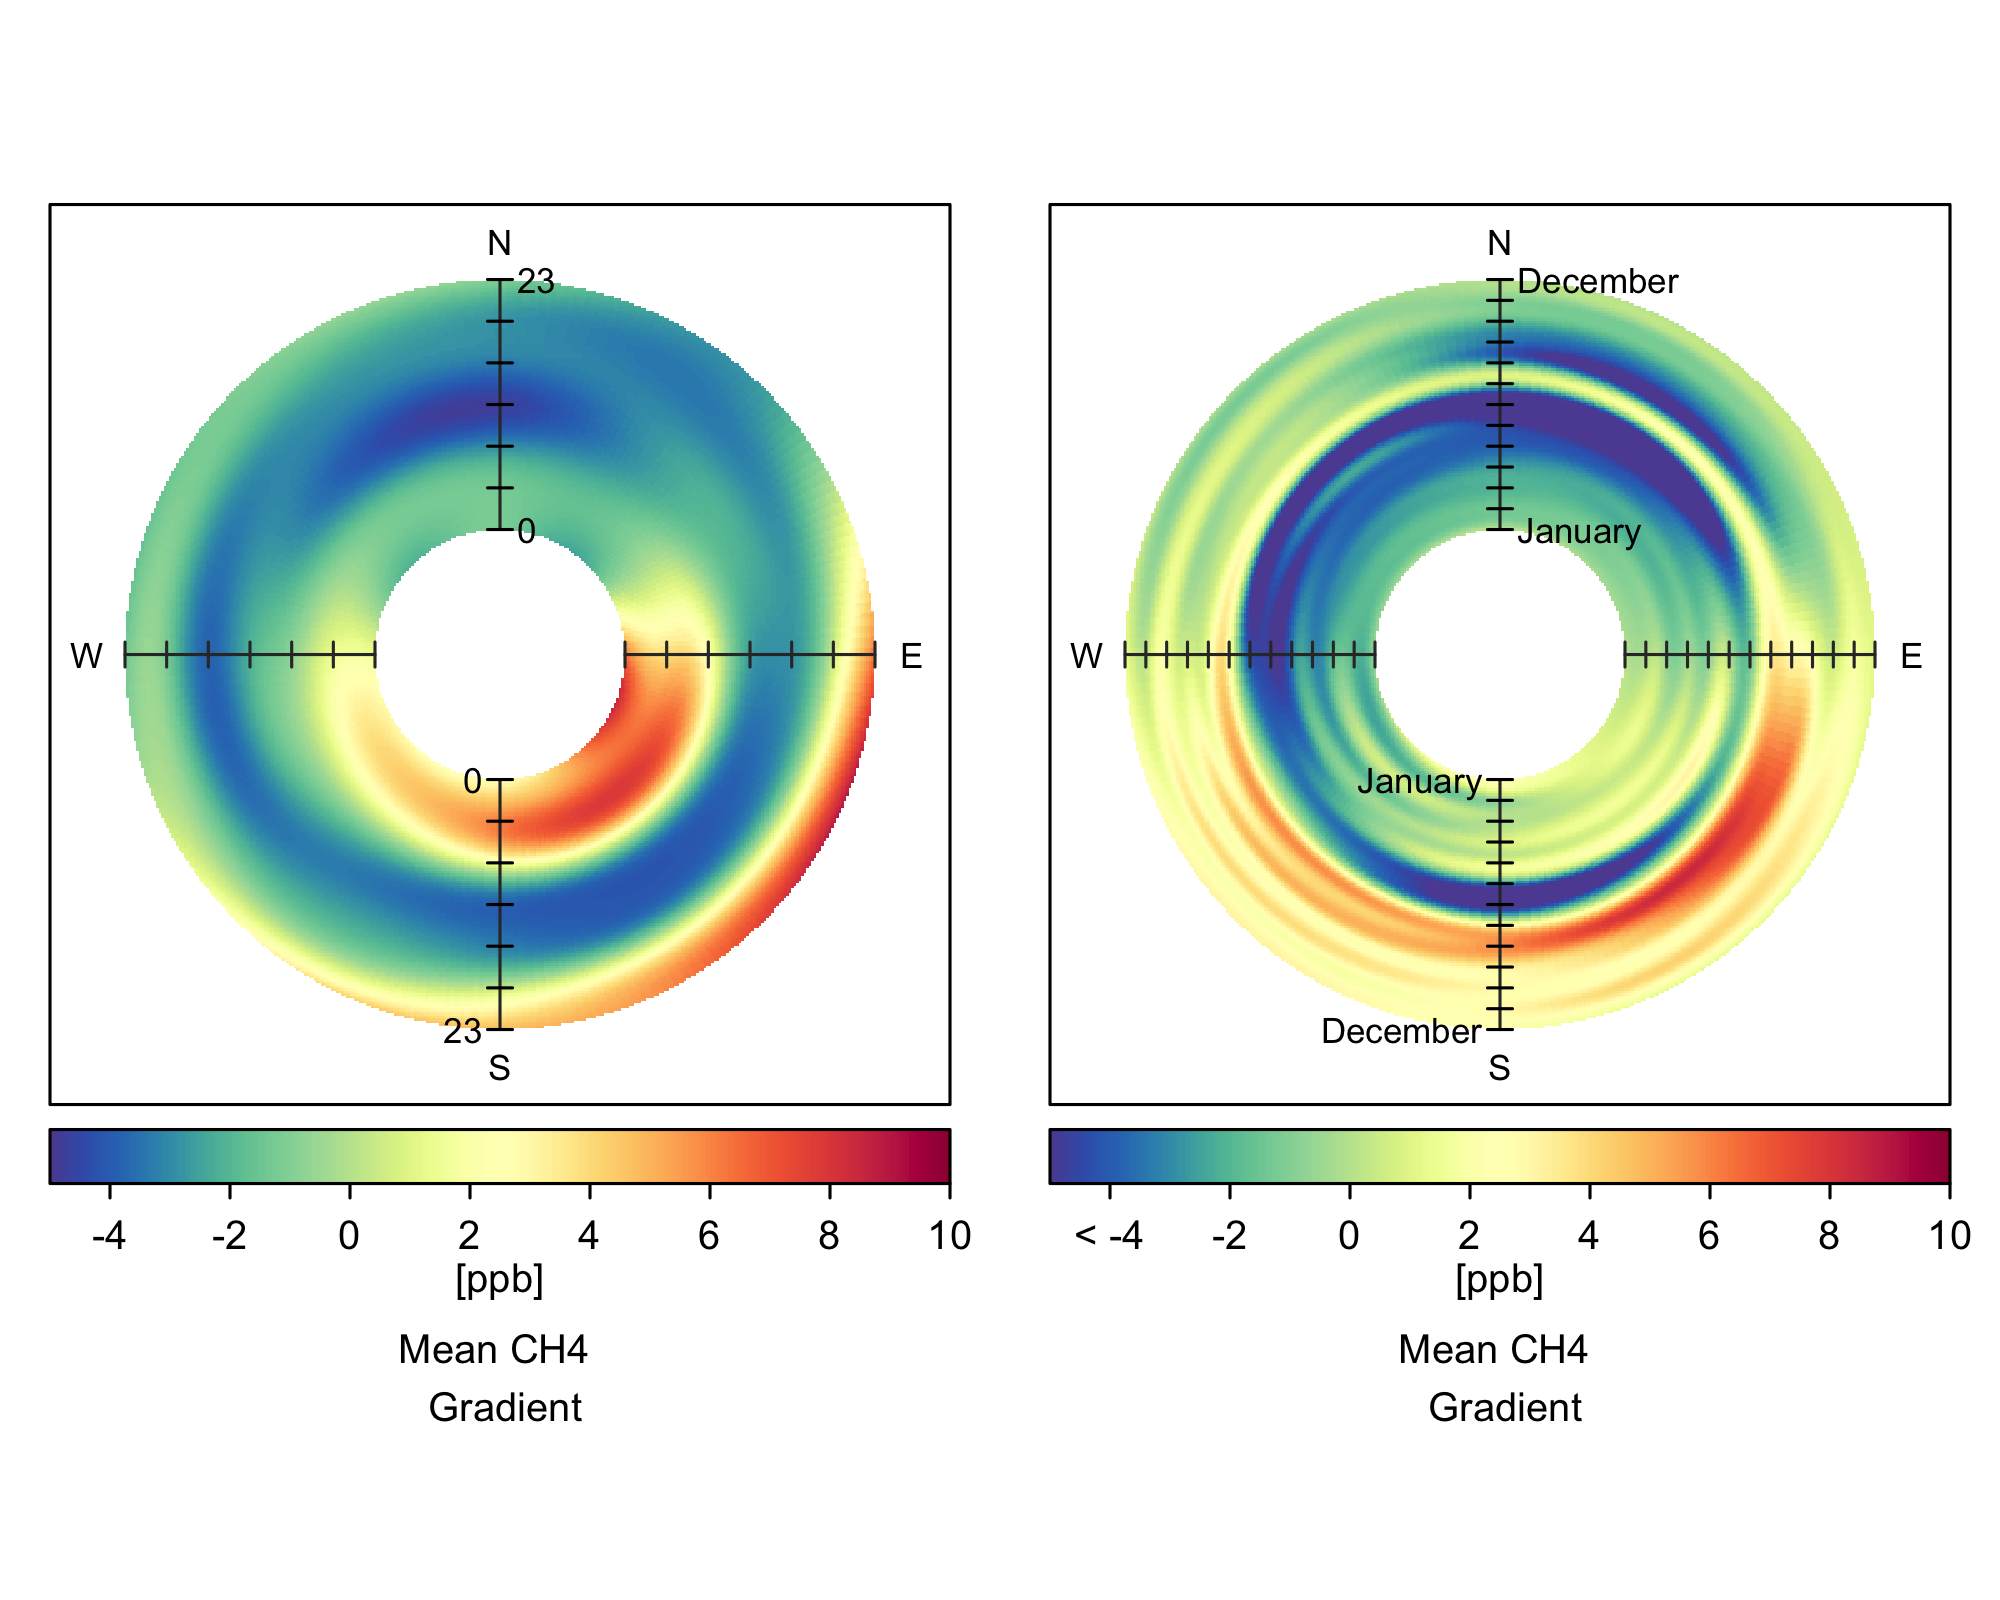

In [46]:
display(Image('./Figures/ATTO_annulus_season-diurnal-LT.png', width=600, unconfined=False))

### Figure 8. Polar CPF of methane gradient above 8 ppb
- This plot was generated in Rstudio using the openair package
- The scripts are found in this directory and the csv file used in Rstudio is found in ./Data


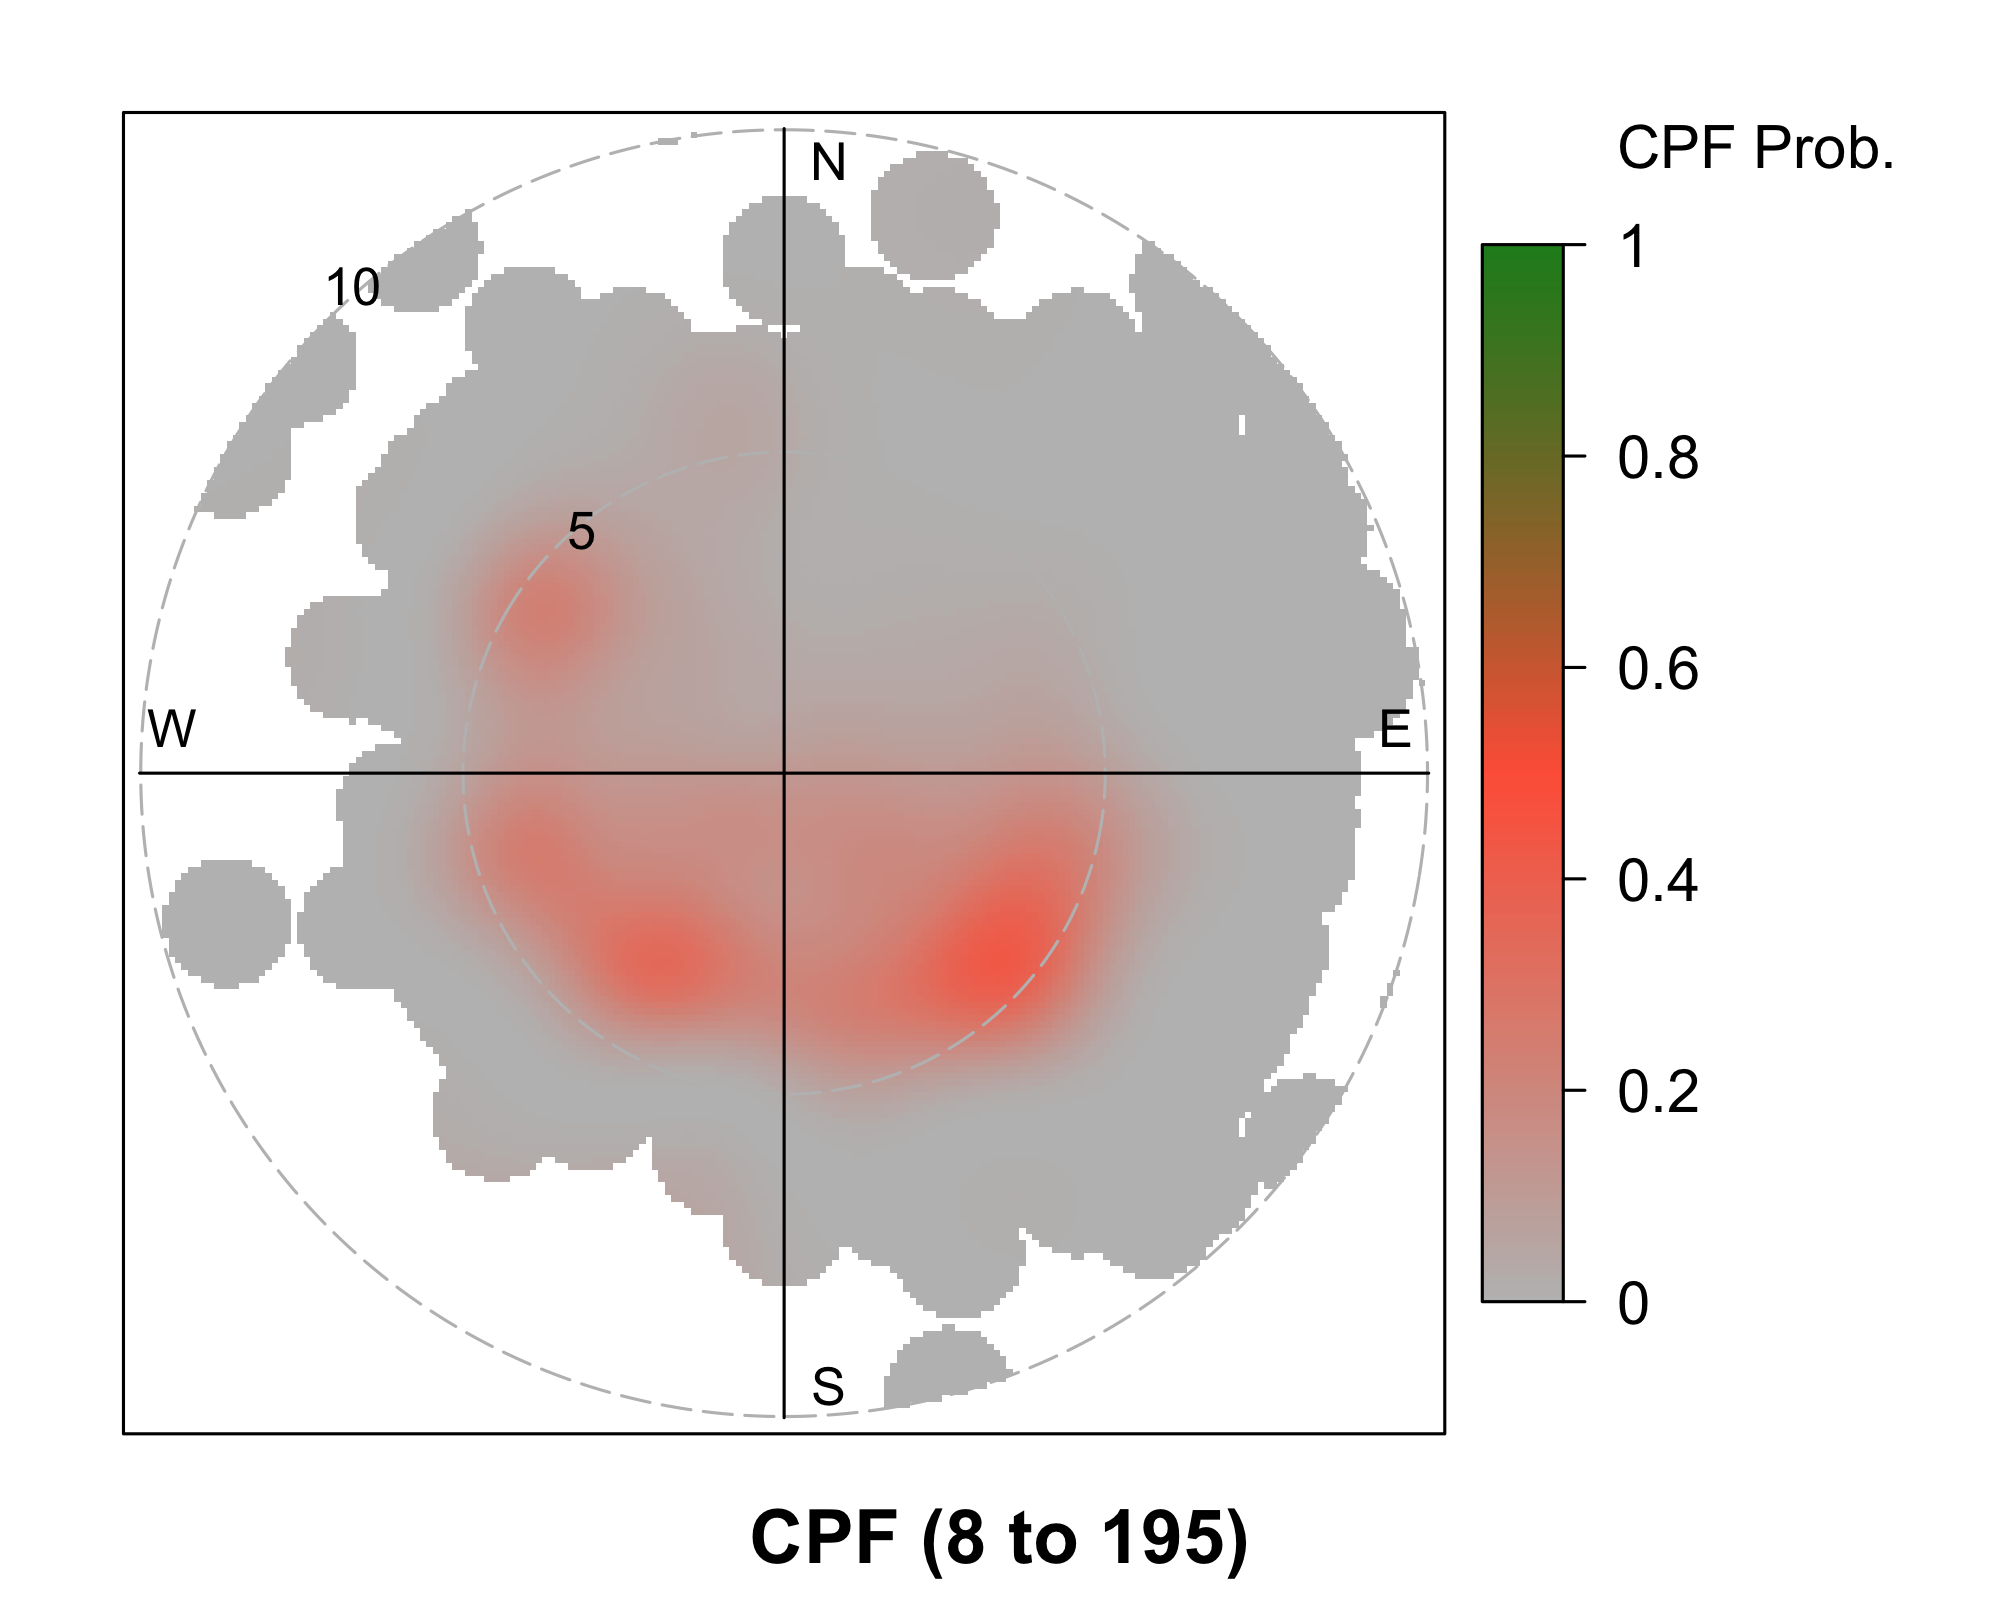

In [47]:
display(Image('./Figures/ATTO_polar_percentiles_88-100_noFooter2.png', width=500, unconfined=False))

### Section 3.2.2. Net radiation, sensible heat flux, friction velocity and thermal stratification for CH4 positive gradients 2013-2018

### Figure 9. Box whisker plot with met variables

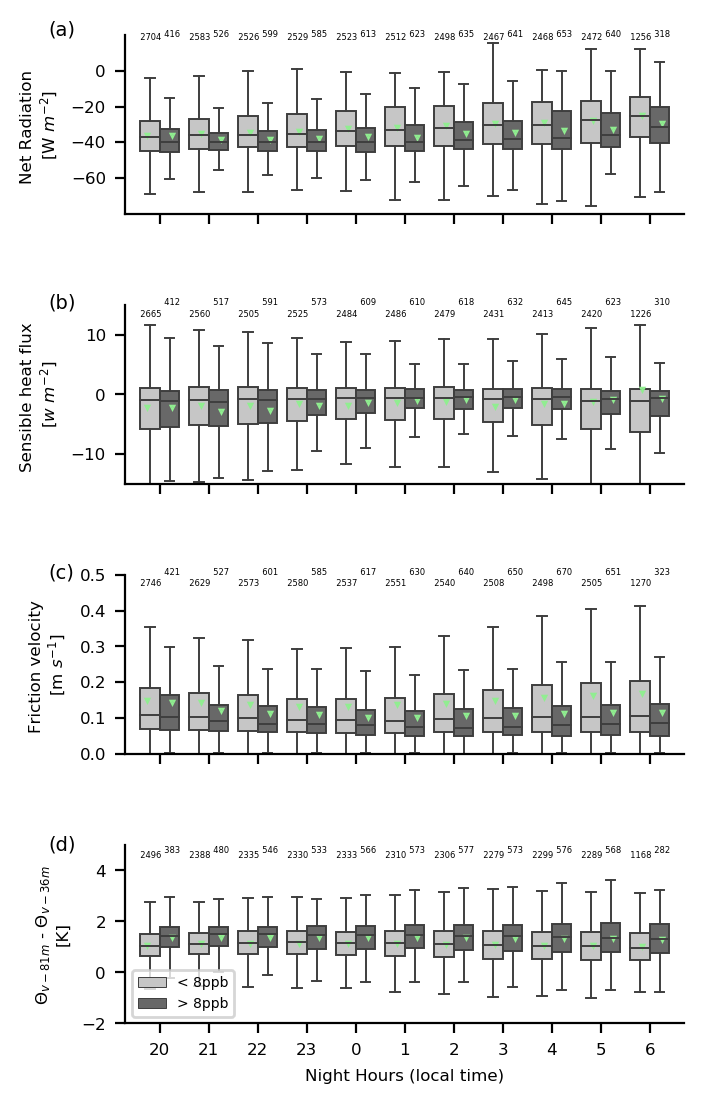

In [49]:
# Importing data, the data here was generated in 3_DataMerging.ipynb
df_full  = pd.read_pickle('./to_Share/Data/ATTO_GHG_Inst_flux_soil_30min')
df_full_n= df_full.between_time('20:00','06:00') # Selecting only nighttime

# Creating Plot
# Row 1 ##########################################################################################
fig      = plt.figure(figsize=(3.5,5.5),dpi=200)
grid     = plt.GridSpec(4,1,wspace=0.6,hspace=0.5)

row1     = fig.add_subplot(grid[0,0])
data     = df_full_n[['Hour','GradFlag','grad','NetRad']].dropna()
df_true  = data[data["GradFlag"]==True].groupby('Hour').count()
df_false = data[data["GradFlag"]==False].groupby('Hour').count()
nobsT    = df_true['NetRad']
nobsF    = df_false['NetRad']
nobs1    = ["  " + str(i) for i in nobsT.values]
new_nobs1 = nobs1[7:] + nobs1[0:7]
#nobs2    = ["n:" + str(i) + " " for i in nobsF.values]
nobs2    = ["  " + str(i) + " " for i in nobsF.values]
new_nobs2 = nobs2[7:] + nobs2[0:7]

meansTrue  = [str(i) for i in data[data['GradFlag']==True].groupby('Hour').mean()['NetRad'].values]
meansFalse = [str(i) for i in data[data['GradFlag']==False].groupby('Hour').mean()['NetRad'].values]
meansTrue  = meansTrue[7:] + meansTrue[0:7]
meansFalse = meansFalse[7:] + meansFalse[0:7]
meansTrue  = [float(i) for i in meansTrue]
meansFalse = [float(i) for i in meansFalse]

sns.boxplot(x='Hour',y='NetRad',hue='GradFlag',data=data,order=[20,21,22,23,0,1,2,3,4,5,6],palette=sns.color_palette(palette="Greys",n_colors=2),showfliers=False,ax=row1,showmeans=False,linewidth=line_width)
row1.set_xlabel(' ')
row1.set_ylabel('Net Radiation \n[W $m^{-2}$]')
row1.set_xticklabels(['','','','','','','','','','',''])
row1.get_legend().remove()
sns.despine()
row1.text(-2, 20, '(a)', horizontalalignment='center', size=7, color='k')    
for i,j in enumerate(new_nobs1):
    row1.text(i+0.2, 19, j, horizontalalignment='center', size=3, color='k')
    row1.text(i-0.2, 17, new_nobs2[i], horizontalalignment='center', size=3, color='k')
row1.plot([0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25,9.25,10.25],meansTrue,linewidth=0,marker='v',markersize=1,color='lightgreen')
row1.plot([-0.25,0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85],meansFalse,linewidth=0,marker='v',markersize=1,color='lightgreen')

# Row 2 ##########################################################################################
data      = df_full_n[['Hour','GradFlag','grad','FluxTsonic[Watt/m2]']].dropna()
df_true   = data[data["GradFlag"]==True].groupby('Hour').count()
df_false  = data[data["GradFlag"]==False].groupby('Hour').count()
nobsT     = df_true['FluxTsonic[Watt/m2]']
nobsF     = df_false['FluxTsonic[Watt/m2]']
nobs1     = ["  " + str(i) for i in nobsT.values]
new_nobs1 = nobs1[7:] + nobs1[0:7]
#nobs2    = ["n:" + str(i) + " " for i in nobsF.values]
nobs2     = ["  " + str(i) + " " for i in nobsF.values]
new_nobs2 = nobs2[7:] + nobs2[0:7]

meansTrue  = [str(i) for i in data[data['GradFlag']==True].groupby('Hour').mean()['FluxTsonic[Watt/m2]'].values]
meansFalse = [str(i) for i in data[data['GradFlag']==False].groupby('Hour').mean()['FluxTsonic[Watt/m2]'].values]
meansTrue  = meansTrue[7:] + meansTrue[0:7]
meansFalse = meansFalse[7:] + meansFalse[0:7]
meansTrue  = [float(i) for i in meansTrue]
meansFalse = [float(i) for i in meansFalse]

row2       = fig.add_subplot(grid[1, 0])
data       = df_full_n[['Hour','GradFlag','FluxTsonic[Watt/m2]']]
sns.boxplot(x='Hour',y='FluxTsonic[Watt/m2]',hue='GradFlag',data=data,order=[20,21,22,23,0,1,2,3,4,5,6],palette=sns.color_palette(palette="Greys",n_colors=2),showfliers=False,ax=row2,showmeans=False,linewidth=line_width)
row2.set_ylabel('Sensible heat flux \n[$w$ $m^{-2}$]')#, fontsize=20)
row2.set_xlabel(' ',fontsize=0)
row2.set_xticklabels(['','','','','','','','','','',''])
row2.get_legend().remove()
row2.set_ylim(-15,15)
sns.despine()
row2.text(-2, 14.5, '(b)', horizontalalignment='center', size=7, color='k')    
for i,j in enumerate(new_nobs1):
    row2.text(i+0.2, 15, j, horizontalalignment='center', size=3, color='k')
    row2.text(i-0.2, 13, new_nobs2[i], horizontalalignment='center', size=3, color='k')
row2.plot([0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25,9.25,10.25],meansTrue,linewidth=0,marker='v',markersize=1,color='lightgreen')
row2.plot([-0.25,0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85],meansFalse,linewidth=0,marker='v',markersize=1,color='lightgreen')

# Row 3 ##########################################################################################
row3     = fig.add_subplot(grid[2,0])
data     = df_full_n[['Hour','GradFlag','grad','U-star[m/s]']].dropna()
df_true  = data[data["GradFlag"]==True].groupby('Hour').count()
df_false = data[data["GradFlag"]==False].groupby('Hour').count()
nobsT    = df_true['U-star[m/s]']
nobsF    = df_false['U-star[m/s]']
nobs1    = ["  " + str(i) for i in nobsT.values]
new_nobs1 = nobs1[7:] + nobs1[0:7]
#nobs2    = ["n:" + str(i) + " " for i in nobsF.values]
nobs2    = ["  " + str(i) + " " for i in nobsF.values]
new_nobs2 = nobs2[7:] + nobs2[0:7]

meansTrue  = [str(i) for i in data[data['GradFlag']==True].groupby('Hour').mean()['U-star[m/s]'].values]
meansFalse = [str(i) for i in data[data['GradFlag']==False].groupby('Hour').mean()['U-star[m/s]'].values]
meansTrue  = meansTrue[7:] + meansTrue[0:7]
meansFalse = meansFalse[7:] + meansFalse[0:7]
meansTrue  = [float(i) for i in meansTrue]
meansFalse = [float(i) for i in meansFalse]

sns.boxplot(x='Hour',y='U-star[m/s]',hue='GradFlag',data=data,order=[20,21,22,23,0,1,2,3,4,5,6],palette=sns.color_palette(palette="Greys",n_colors=2),showfliers=False,ax=row3,showmeans=False,linewidth=line_width)
row3.set_ylabel('Friction velocity \n[m $s^{-1}$]')#, fontsize=20)
row3.set_xlabel(' ',fontsize=0)
row3.set_xticklabels(['','','','','','','','','','',''])
row3.set_ylim(0,0.5)
row3.get_legend().remove()
sns.despine()

row3.text(-2, 0.49, '(c)', horizontalalignment='center', size=7, color='k')    
for i,j in enumerate(new_nobs1):
    row3.text(i+0.2, 0.5, j, horizontalalignment='center', size=3, color='k')
    row3.text(i-0.2, 0.47, new_nobs2[i], horizontalalignment='center', size=3, color='k')
row3.plot([0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25,9.25,10.25],meansTrue,linewidth=0,marker='v',markersize=1,color='lightgreen')
row3.plot([-0.25,0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85],meansFalse,linewidth=0,marker='v',markersize=1,color='lightgreen')

# Row 4 ##########################################################################################
row4     = fig.add_subplot(grid[3,0])
data     = df_full_n[['Hour','GradFlag','PotVirt_81m','PotVirt_36m','grad']].dropna()
data     = data.assign(PotGradAbove = data['PotVirt_81m'] - data['PotVirt_36m'])
df_true  = data[data["GradFlag"]==True].groupby('Hour').count()
df_false = data[data["GradFlag"]==False].groupby('Hour').count()
nobsT    = df_true['PotGradAbove']
nobsF    = df_false['PotGradAbove']
nobs1    = ["  " + str(i) for i in nobsT.values]
new_nobs1 = nobs1[7:] + nobs1[0:7]
#nobs2    = ["n:" + str(i) + " " for i in nobsF.values]
nobs2    = ["  " + str(i) + " " for i in nobsF.values]
new_nobs2 = nobs2[7:] + nobs2[0:7]

meansTrue  = [str(i) for i in data[data['GradFlag']==True].groupby('Hour').mean()['PotGradAbove'].values]
meansFalse = [str(i) for i in data[data['GradFlag']==False].groupby('Hour').mean()['PotGradAbove'].values]
meansTrue  = meansTrue[7:] + meansTrue[0:7]
meansFalse = meansFalse[7:] + meansFalse[0:7]
meansTrue  = [float(i) for i in meansTrue]
meansFalse = [float(i) for i in meansFalse]

sns.boxplot(x='Hour',y='PotGradAbove',hue='GradFlag',data=data,order=[20,21,22,23,0,1,2,3,4,5,6],palette=sns.color_palette(palette="Greys",n_colors=2),showfliers=False,ax=row4,showmeans=False,linewidth=line_width)
row4.set_ylabel('$\Theta_{v-81m}$ - $\Theta_{v-36m}$ \n[K]')#, fontsize=20)
row4.set_ylim(-2,5)
row4.set_xlabel(' ',fontsize=0)
row4.set_xlabel('Night Hours (local time)',fontsize=font_size)
sns.despine()
handles, _ = row4.get_legend_handles_labels()
row4.legend(handles, ["< 8ppb", "> 8ppb"],loc='lower left',fontsize=5)
row4.text(-2, 4.8, '(d)', horizontalalignment='center', size=7, color='k')    
for i,j in enumerate(new_nobs1):
    row4.text(i+0.2, 4.7, j, horizontalalignment='center', size=3, color='k')
    row4.text(i-0.2, 4.5, new_nobs2[i], horizontalalignment='center', size=3, color='k')
row4.plot([0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25,9.25,10.25],meansTrue,linewidth=0,marker='v',markersize=1,color='lightgreen')
row4.plot([-0.25,0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85],meansFalse,linewidth=0,marker='v',markersize=1,color='lightgreen')


mpl.rcParams['font.size'] = 6
grid.tight_layout(fig,h_pad=2)
plt.show()
#fig.savefig('./Figures/Fig09.png',dpi=300)

### Section 3.2.3. Association of positive CH4 gradients and NBL turbulence regimes

### Figure 10. Turbulent regimes based on wind speed bins and $\sigma_{w}$
- Here we assumed that each 15 minute CH$_4$ concentration measurements is independent. See methods in paper.

In [50]:
# Import dataframe generated in DataMerging.ipynb
# Time resolution is 1 min
df_full = pd.read_pickle('./to_Share/Data/df_GHG_uvw_1min_merged')
df_full = df_full.between_time('20:00','06:00',include_start=True,include_end=True)
#df_full.head();

In [51]:
# Adding a flag that indicates if the wind speed range between max and min oscillated more than 0.5 m s-1 in every 15 min window.
step_15min = pd.date_range('2014-02-28 20:00:00','2014-09-30 06:15:00',freq='15T')
df_full    = df_full.assign(windFlag     = 0)
df_full    = df_full.assign(wind_15min_std = 0)

for i,j in enumerate(step_15min,start=1):
    if i == step_15min.shape[0]:break
    start     = step_15min[i-1]
    end       = step_15min[i] - pd.to_timedelta(1,unit='T')
    grad      = df_full.loc[start:end,'CH4_grad']
    wind      = df_full.loc[start:end,'mean_wind81']
    win_range = wind.max() - wind.min()

    df_full.loc[start:end,'wind_15min_std'] = wind.std()    
    if win_range <= 0.5:
        df_full.loc[start:end,'windFlag'] = True
    else:
        df_full.loc[start:end,'windFlag'] = False

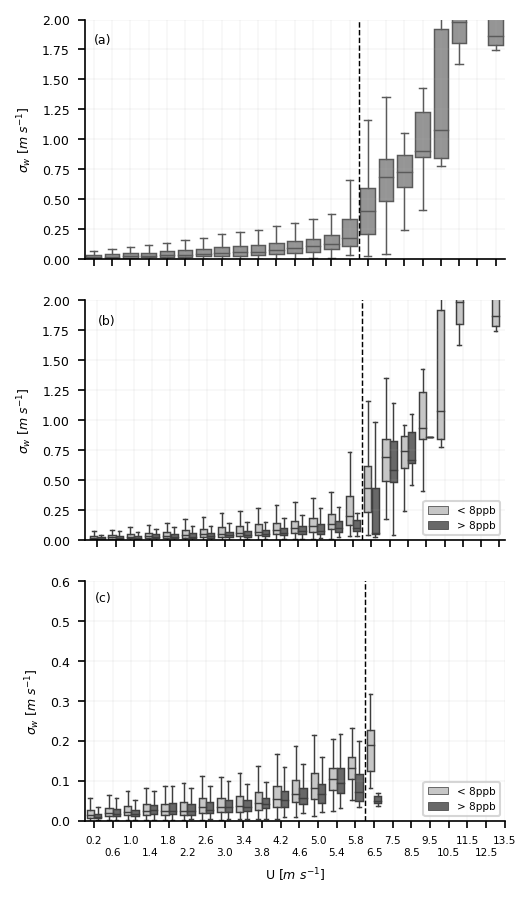

In [52]:
# 1 min plot
fig        = plt.figure(figsize=(3.5,6),dpi=150)
grid       = plt.GridSpec(3,1,wspace=0.6,hspace=0.2)
enhanIdx   = 'EnhanGrad'

# Row 1 ===================================================================================
ax1        = fig.add_subplot(grid[0, 0])
df         = df_full
idx        = df['WindClassMid'].astype(np.float64) < 15 # selecting bins lower than 15 m s-1
data       = df[idx] #df_full[idx]
labels     = ['%.1f'%(i) for i in sorted(list(set(data['WindClassMid'].values)))]
labels[-1] = '12.5'
labels.append('13.5')
labelsss   = []
for i,j in enumerate(labels):
    if i%2==1:
        labelsss.append('\n%s'%(j))
    else:
        labelsss.append(j)

sns.boxplot(x='WindClassMid',y='sigma_w',data=data,palette=sns.color_palette(palette="Greys",n_colors=1),
            showfliers=True,fliersize=0,ax=ax1,showmeans=False,linewidth=0.7)

ax1.text(0.5, 1.8, '(a)', horizontalalignment='center', size='medium', color='k')
ax1.grid(alpha=0.1)
ax1.set_xticklabels(['']*len(labels))
ax1.set_ylabel('$\sigma_w$ [$m$ $s^{-1}$]')
ax1.set_xlabel(' ')
ax1.set_ylim(0,2)
ax1.vlines(14.5,0,2.5,color='k',linestyles='--',linewidth=0.7)
sns.despine()

# Row 2 ===================================================================================
ax3        = fig.add_subplot(grid[1,0])
idx        = df_full['WindClassMid'].astype(np.float64) < 15
data       = df_full[idx]
enhan      = data.loc[data[enhanIdx]==True].groupby(data.loc[data[enhanIdx]==True]['WindClassMid']).median()['sigma_w'].values
notenhan   = data.loc[data[enhanIdx]==False].groupby(data.loc[data[enhanIdx]==False]['WindClassMid']).median().values
nobs1      = data.loc[data[enhanIdx]==True].groupby(['WindClassMid'])['sigma_w'].agg(['count'])
nobs2      = data.loc[data[enhanIdx]==False].groupby(['WindClassMid'])['sigma_w'].agg(['count'])
nobs1      = ["nE: " + str(i) for s in nobs1.values for i in s]
nobs2      = ["n: " + str(i) for s in nobs2.values for i in s]

sns.boxplot(x='WindClassMid',y='sigma_w',hue=enhanIdx,data=data,palette=sns.color_palette(palette="Greys",n_colors=2),
            showfliers=True,fliersize=0,showmeans=False,ax=ax3,linewidth=0.7)

#for i,j in enumerate(nobs1[:-2]):
#    ax1.text(i, 2.1, j, horizontalalignment='center', size='medium', color='k')#
#for i,j in enumerate(nobs2[:-2]):
#    ax1.text(i, 2, j, horizontalalignment='center', size='medium', color='k')

ax3.text(0.5, 1.8, '(b)', horizontalalignment='center', size='medium', color='k')
ax3.grid(alpha=0.1)
ax3.set_ylabel('$\sigma_w$ [$m$ $s^{-1}$]')#, fontsize=20)
ax3.set_xlabel(' ')
ax3.set_xticklabels(['']*len(labels))
handles, _ = ax3.get_legend_handles_labels()
ax3.legend(handles, ["< 8ppb", "> 8ppb"],loc='lower right',fontsize=5)
ax3.set_ylim(0,2)
ax3.vlines(14.5,0,2.5,color='k',linestyles='--',linewidth=0.7)
sns.despine()

# Row 3 ===================================================================================

ax2        = fig.add_subplot(grid[2, 0])
df         = df_full[df_full['windFlag'] == True]
idx        = df['WindClassMid'].astype(np.float64) < 15
data       = df[idx]
enhan      = data.loc[data[enhanIdx]==True].groupby(data.loc[data[enhanIdx]==True]['WindClassMid']).median()['sigma_w'].values
notenhan   = data.loc[data[enhanIdx]==False].groupby(data.loc[data[enhanIdx]==False]['WindClassMid']).median().values
nobs1      = data.loc[data[enhanIdx]==True].groupby(['WindClassMid'])['sigma_w'].agg(['count'])
nobs2      = data.loc[data[enhanIdx]==False].groupby(['WindClassMid'])['sigma_w'].agg(['count'])
nobs1      = ["n:%s-"%(str(i)) for s in nobs1.values for i in s]
nobs2      = ["" + str(i) for s in nobs2.values for i in s]

sns.boxplot(x='WindClassMid',y='sigma_w',hue=enhanIdx,data=data,palette=sns.color_palette(palette="Greys",n_colors=2),
            showfliers=True,fliersize=0,showmeans=False,ax=ax2,linewidth=0.7)

#for i,j in enumerate(nobs1[0:-11]):
#    ax2.text(i, 0.35, j, horizontalalignment='center', size='small', color='k')
#    ax2.text(i+0.33, 0.35, nobs2[i], horizontalalignment='center', size='small', color='k')

ax2.text(0.5, 0.55, '(c)', horizontalalignment='center', size='medium', color='k')
ax2.grid(alpha=0.1)
ax2.set_ylabel('$\sigma_w$ [$m$ $s^{-1}$]')#, fontsize=20)
ax2.set_xlabel('U [$m$ $s^{-1}$]')
ax2.set_xticklabels(labelsss,fontsize=5)
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, ["< 8ppb", "> 8ppb"],loc='lower right',fontsize=5)
ax2.set_ylim(0,0.6)
ax2.set_xlim(-.5,22)
ax2.vlines(14.5,0,2.5,color='k',linestyles='--',linewidth=0.7)
sns.despine()
#==========

plt.rcParams.update({'font.size': 7})
grid.tight_layout(fig,h_pad=0)
plt.show()
#fig.savefig('ATTO_turb_regimes_nights.png',dpi=300)

### Averaging to 5 min, Referee 2

In [55]:
df_full_5min = df_full.resample('5min').mean()
bins         = [np.arange(0,6,0.4),np.arange(6,15,1)] # final bin configuration used in paper
bins         = np.concatenate(bins).ravel()
df_full_5min = df_full_5min.assign(WindClass = pd.cut(df_full['mean_wind81'],bins,right=True))

def mid(interval):
    return interval.mid

df_full_5min    = df_full_5min.assign(WindClassMid = df_full.WindClass.apply(mid))

step_15min      = pd.date_range('2014-02-28 20:00:00','2014-09-30 06:15:00',freq='15T')
df_full_5min    = df_full_5min.assign(windFlag     = 0)
df_full_5min    = df_full_5min.assign(wind_15min_std = 0)

for i,j in enumerate(step_15min,start=1):
    if i == step_15min.shape[0]:break
    start     = step_15min[i-1]
    end       = step_15min[i] - pd.to_timedelta(1,unit='T')
    grad      = df_full_5min.loc[start:end,'CH4_grad']
    wind      = df_full_5min.loc[start:end,'mean_wind81']
    win_range = wind.max() - wind.min()

    df_full.loc[start:end,'wind_15min_std'] = wind.std()    
    if win_range <= 0.5:
        df_full_5min.loc[start:end,'windFlag'] = True
    else:
        df_full_5min.loc[start:end,'windFlag'] = False

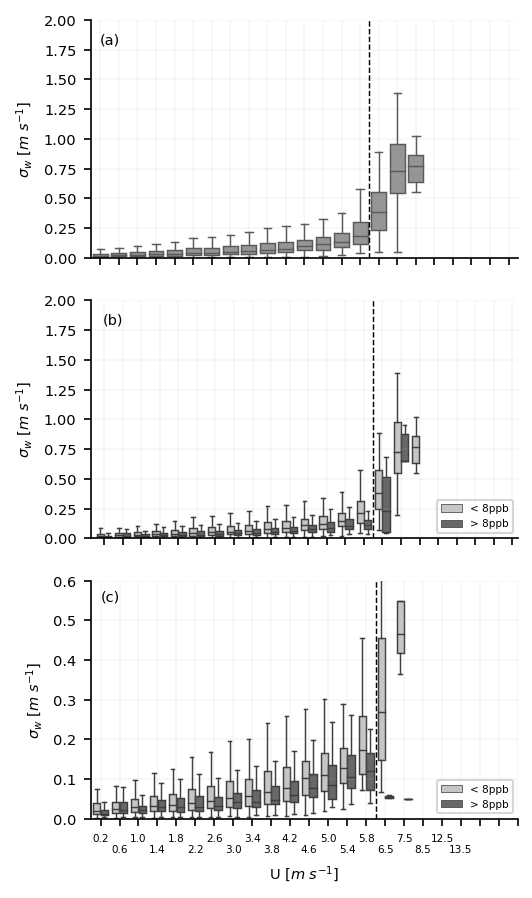

In [56]:
# 5 min plot
fig        = plt.figure(figsize=(3.5,6),dpi=150)
grid       = plt.GridSpec(3,1,wspace=0.6,hspace=0.2)
enhanIdx   = 'EnhanGrad'

# Row 1 ===================================================================================
ax1        = fig.add_subplot(grid[0, 0])
df         = df_full_5min
idx        = df['WindClassMid'].astype(np.float64) < 15 # selecting bins lower than 15 m s-1
data       = df[idx] #df_full[idx]
labels     = ['%.1f'%(i) for i in sorted(list(set(data['WindClassMid'].values)))]
labels[-1] = '12.5'
labels.append('13.5')
labelsss   = []
for i,j in enumerate(labels):
    if i%2==1:
        labelsss.append('\n%s'%(j))
    else:
        labelsss.append(j)

sns.boxplot(x='WindClassMid',y='sigma_w',data=data,palette=sns.color_palette(palette="Greys",n_colors=1),
            showfliers=True,fliersize=0,ax=ax1,showmeans=False,linewidth=0.7)

ax1.text(0.5, 1.8, '(a)', horizontalalignment='center', size='medium', color='k')
ax1.grid(alpha=0.1)
ax1.set_xticklabels(['']*len(labels))
ax1.set_ylabel('$\sigma_w$ [$m$ $s^{-1}$]')
ax1.set_xlabel(' ')
ax1.set_ylim(0,2)
ax1.vlines(14.5,0,2.5,color='k',linestyles='--',linewidth=0.7)
sns.despine()


# Row 2 ===================================================================================
ax3        = fig.add_subplot(grid[1,0])
idx        = df_full_5min['WindClassMid'].astype(np.float64) < 15
data       = df_full_5min[idx]
enhan      = data.loc[data[enhanIdx]==True].groupby(data.loc[data[enhanIdx]==True]['WindClassMid']).median()['sigma_w'].values
notenhan   = data.loc[data[enhanIdx]==False].groupby(data.loc[data[enhanIdx]==False]['WindClassMid']).median().values
nobs1      = data.loc[data[enhanIdx]==True].groupby(['WindClassMid'])['sigma_w'].agg(['count'])
nobs2      = data.loc[data[enhanIdx]==False].groupby(['WindClassMid'])['sigma_w'].agg(['count'])
nobs1      = ["nE: " + str(i) for s in nobs1.values for i in s]
nobs2      = ["n: " + str(i) for s in nobs2.values for i in s]

sns.boxplot(x='WindClassMid',y='sigma_w',hue=enhanIdx,data=data,palette=sns.color_palette(palette="Greys",n_colors=2),
            showfliers=True,fliersize=0,showmeans=False,ax=ax3,linewidth=0.7)

#for i,j in enumerate(nobs1[:-2]):
#    ax1.text(i, 2.1, j, horizontalalignment='center', size='medium', color='k')#
#for i,j in enumerate(nobs2[:-2]):
#    ax1.text(i, 2, j, horizontalalignment='center', size='medium', color='k')

ax3.text(0.5, 1.8, '(b)', horizontalalignment='center', size='medium', color='k')
ax3.grid(alpha=0.1)
ax3.set_ylabel('$\sigma_w$ [$m$ $s^{-1}$]')#, fontsize=20)
ax3.set_xlabel(' ')
ax3.set_xticklabels(['']*len(labels))
handles, _ = ax3.get_legend_handles_labels()
ax3.legend(handles, ["< 8ppb", "> 8ppb"],loc='lower right',fontsize=5)
ax3.set_ylim(0,2)
ax3.vlines(14.5,0,2.5,color='k',linestyles='--',linewidth=0.7)
sns.despine()

# Row 3 ===================================================================================

ax2        = fig.add_subplot(grid[2, 0])
df         = df_full_5min[df_full_5min['windFlag'] == True]
idx        = df['WindClassMid'].astype(np.float64) < 15
data       = df[idx]
enhan      = data.loc[data[enhanIdx]==True].groupby(data.loc[data[enhanIdx]==True]['WindClassMid']).median()['sigma_w'].values
notenhan   = data.loc[data[enhanIdx]==False].groupby(data.loc[data[enhanIdx]==False]['WindClassMid']).median().values
nobs1      = data.loc[data[enhanIdx]==True].groupby(['WindClassMid'])['sigma_w'].agg(['count'])
nobs2      = data.loc[data[enhanIdx]==False].groupby(['WindClassMid'])['sigma_w'].agg(['count'])
nobs1      = ["n:%s-"%(str(i)) for s in nobs1.values for i in s]
nobs2      = ["" + str(i) for s in nobs2.values for i in s]

sns.boxplot(x='WindClassMid',y='sigma_w',hue=enhanIdx,data=data,palette=sns.color_palette(palette="Greys",n_colors=2),
            showfliers=True,fliersize=0,showmeans=False,ax=ax2,linewidth=0.7)

#for i,j in enumerate(nobs1[0:-11]):
#    ax2.text(i, 0.35, j, horizontalalignment='center', size='small', color='k')
#    ax2.text(i+0.33, 0.35, nobs2[i], horizontalalignment='center', size='small', color='k')

ax2.text(0.5, 0.55, '(c)', horizontalalignment='center', size='medium', color='k')
ax2.grid(alpha=0.1)
ax2.set_ylabel('$\sigma_w$ [$m$ $s^{-1}$]')#, fontsize=20)
ax2.set_xlabel('U [$m$ $s^{-1}$]')
ax2.set_xticklabels(labelsss,fontsize=5)
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, ["< 8ppb", "> 8ppb"],loc='lower right',fontsize=5)
ax2.set_ylim(0,0.6)
ax2.set_xlim(-.5,22)
ax2.vlines(14.5,0,2.5,color='k',linestyles='--',linewidth=0.7)
sns.despine()
#==========

plt.rcParams.update({'font.size': 7})
grid.tight_layout(fig,h_pad=0)
plt.show()
#fig.savefig('../Rebuttal/ATTO_turb_regimes_nights_5min.png',dpi=300)